# Binary trees

This file demonstrates data on the performance of various binary search trees.
The following data structures were implemented:

- Naive binary search tree
- AVL-Tree
- Treap
- Splay Tree
- Skip List

## Testing methods

- Each algorithm was tested on random data or sorted data, with sample sizes
    ranging from $10^6$ to $10^7$ for random data and from $10^5$ to $10^6$ for
    sorted data.
- Each sample size range was divided into 10 evenly spaced test cases
- Each test case was repeated 5 times and the average of 5 tests were taken as
    a result
- Each case with sample size of $n$ consisted of $n$ sequential inserts, followed
    by $\frac{n}{2}$ sequential erases of every other element in input data
- Random seed was set to the same value before testing begun for each of data
    structures, to ensure fair test cases
- Random-based data structures (SkipList, Treap) did not utilize C `rand()`
    function to not interfere with random test generation. Classes of module
    `<random>` were used instead
- Long tests (>1 minute) were not repeated and the testing was not continued

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
random_insert = pd.read_csv("results/test_random_insert.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
random_erase = pd.read_csv("results/test_random_erase.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
sorted_insert = pd.read_csv("results/test_sorted_insert.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")
sorted_erase = pd.read_csv("results/test_sorted_erase.csv")\
                    .pivot(index="Sample Size", columns="Tree", values="Elapsed Time (ms)")


## Random data

Here are the results of tests on random input data:

<Axes: title={'center': 'Random erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

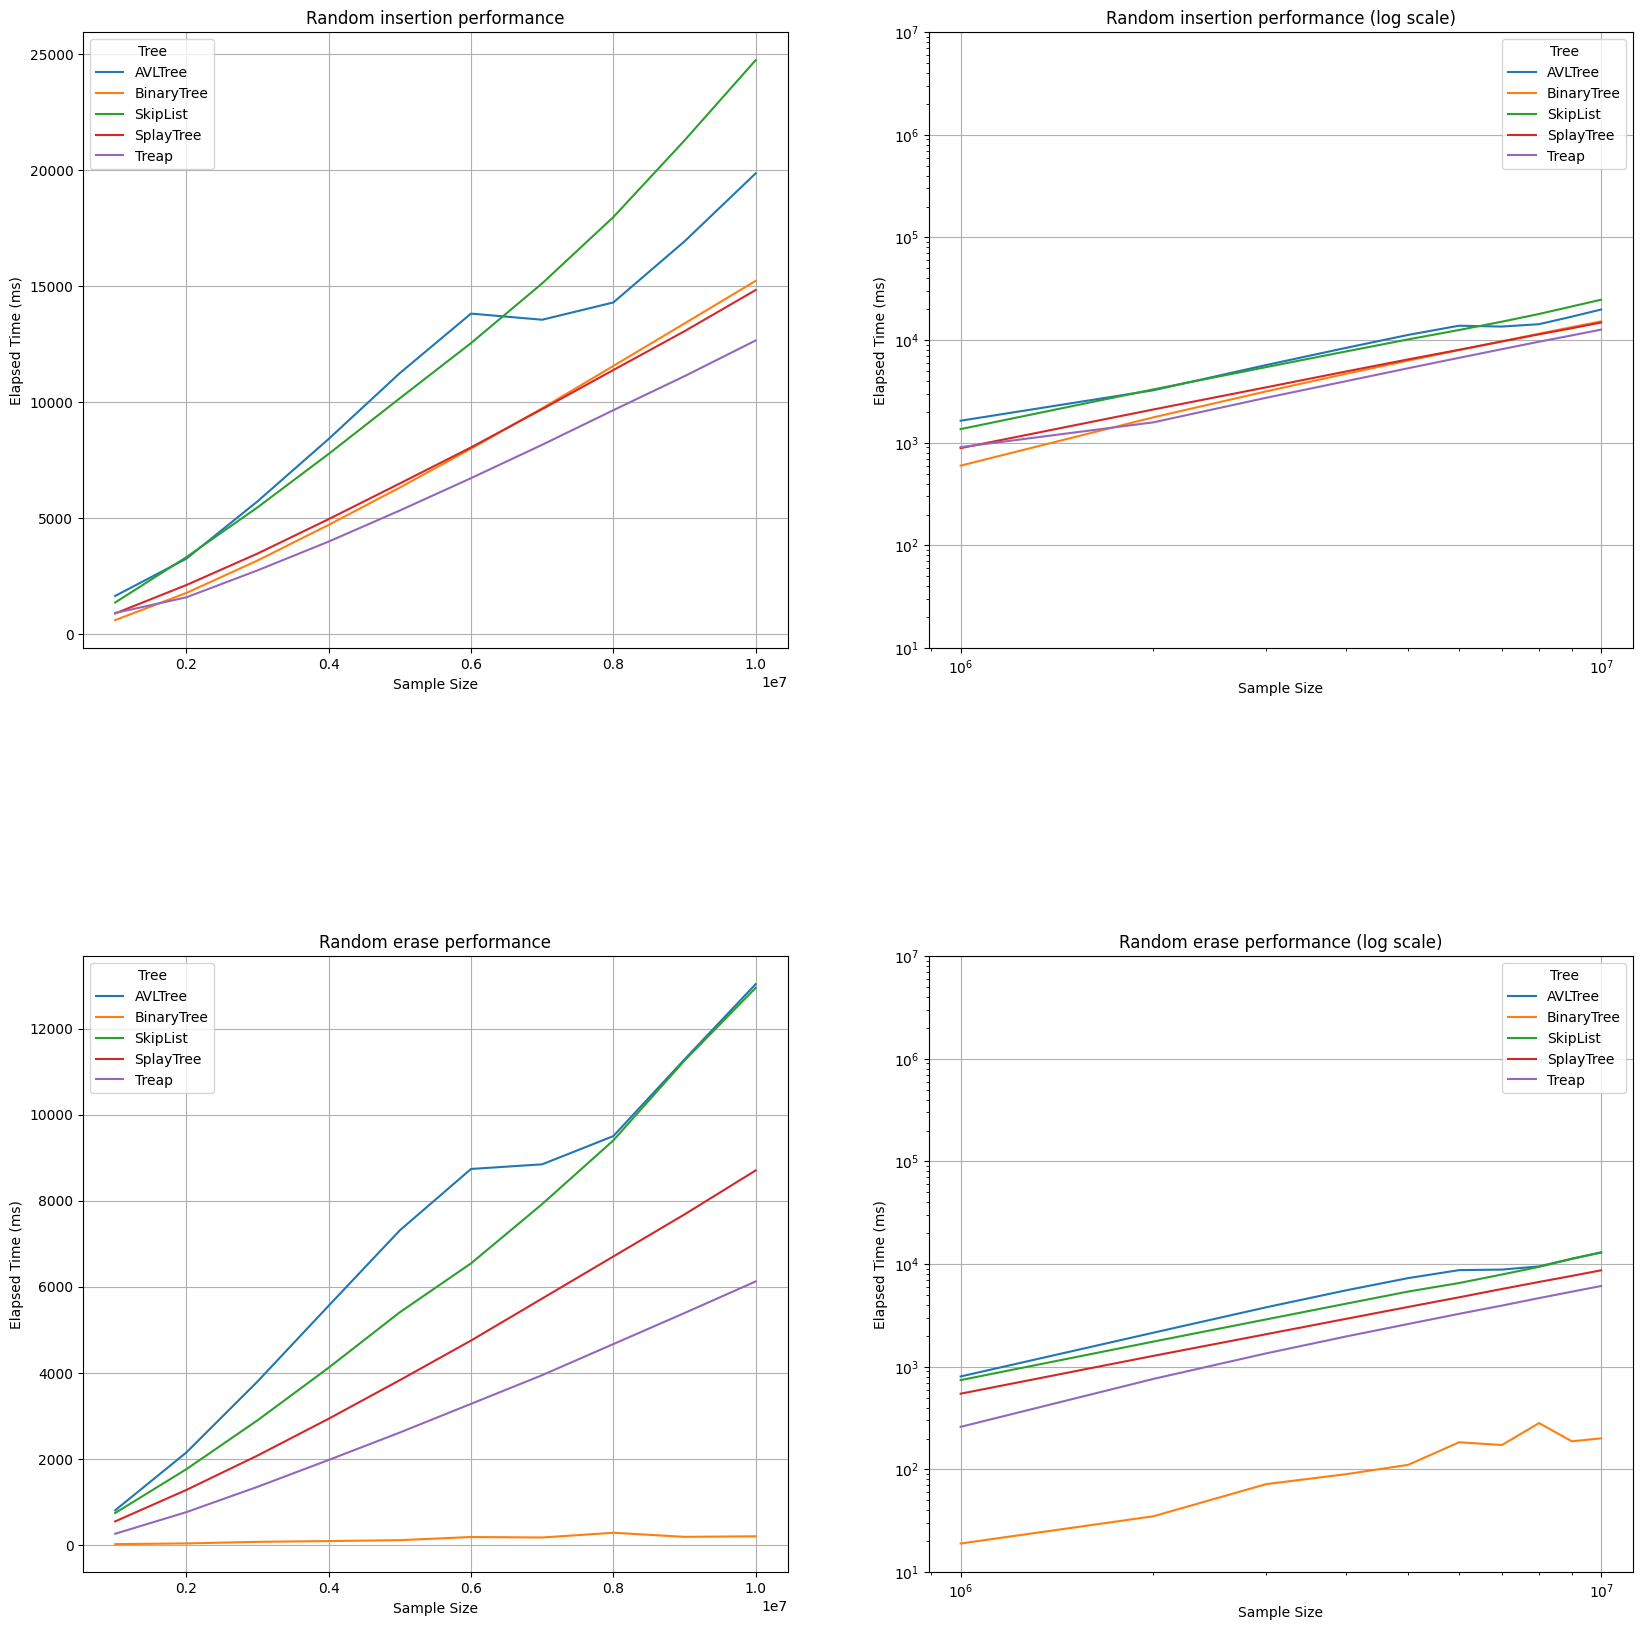

In [3]:
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
random_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Random insertion performance",
        grid=True)
random_insert[random_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Random insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
random_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Random erase performance",
        grid=True)
random_erase[random_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Random erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

As we can see, binary tree clearly outperforms other data structures, due to its
simple implementation and lack of any time-consuming self-balancing
operations.

## Sorted data results

Here are the results of tests on sorted data:

<Axes: title={'center': 'Sorted erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

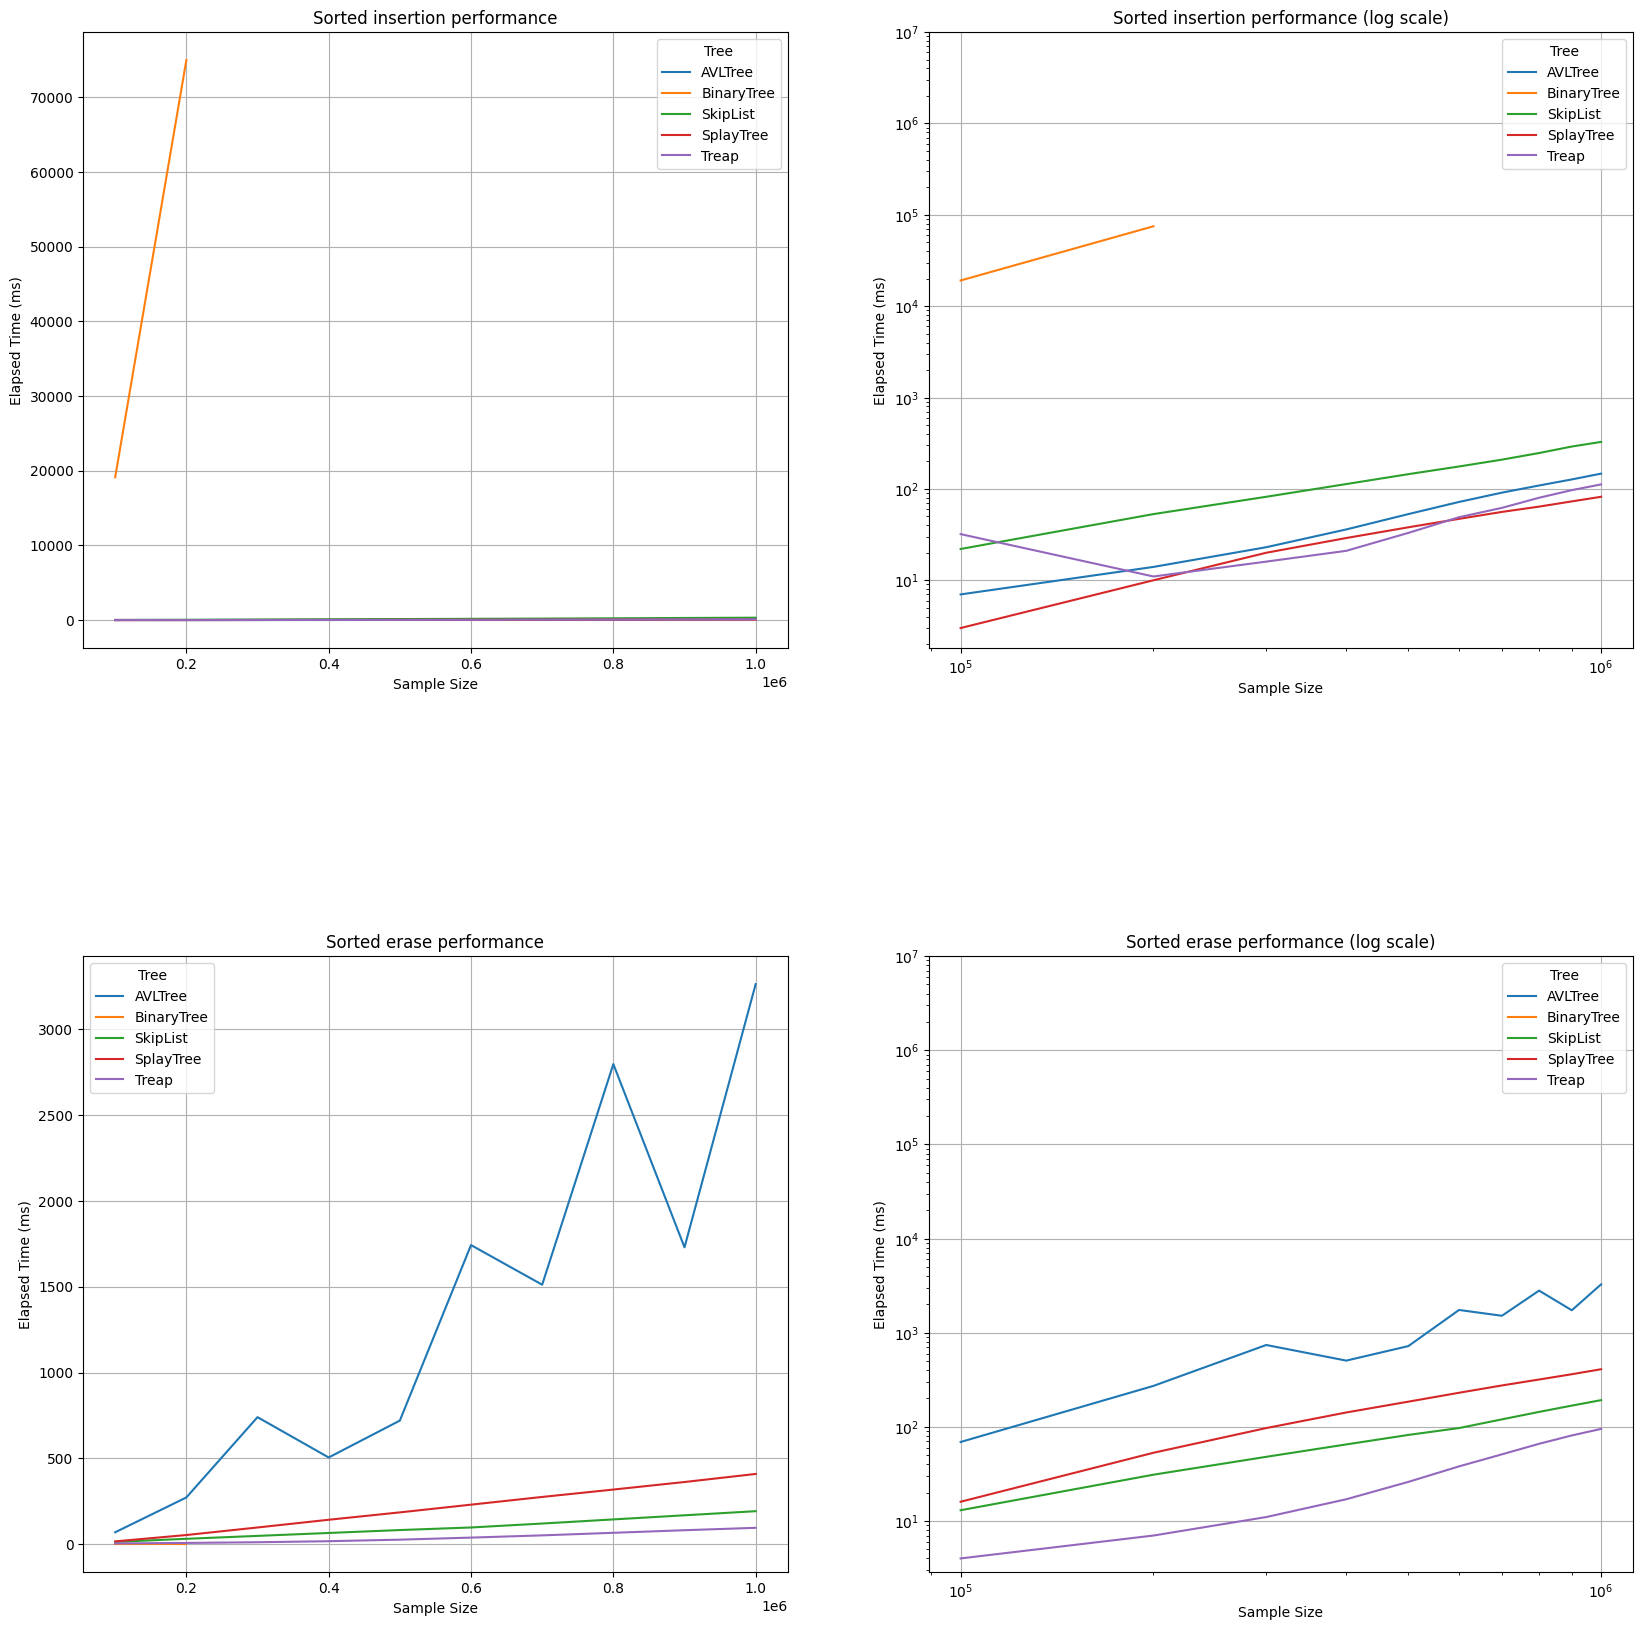

In [4]:

figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
sorted_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance",
        grid=True)
sorted_insert[sorted_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
sorted_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance",
        grid=True)
sorted_erase[sorted_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

Naive implementation of binary search tree performs very slowly and doesn't
let us see the difference in performance of other data structures. We will
consider them separately:

<Axes: title={'center': 'Sorted erase performance (log scale)'}, xlabel='Sample Size', ylabel='Elapsed Time (ms)'>

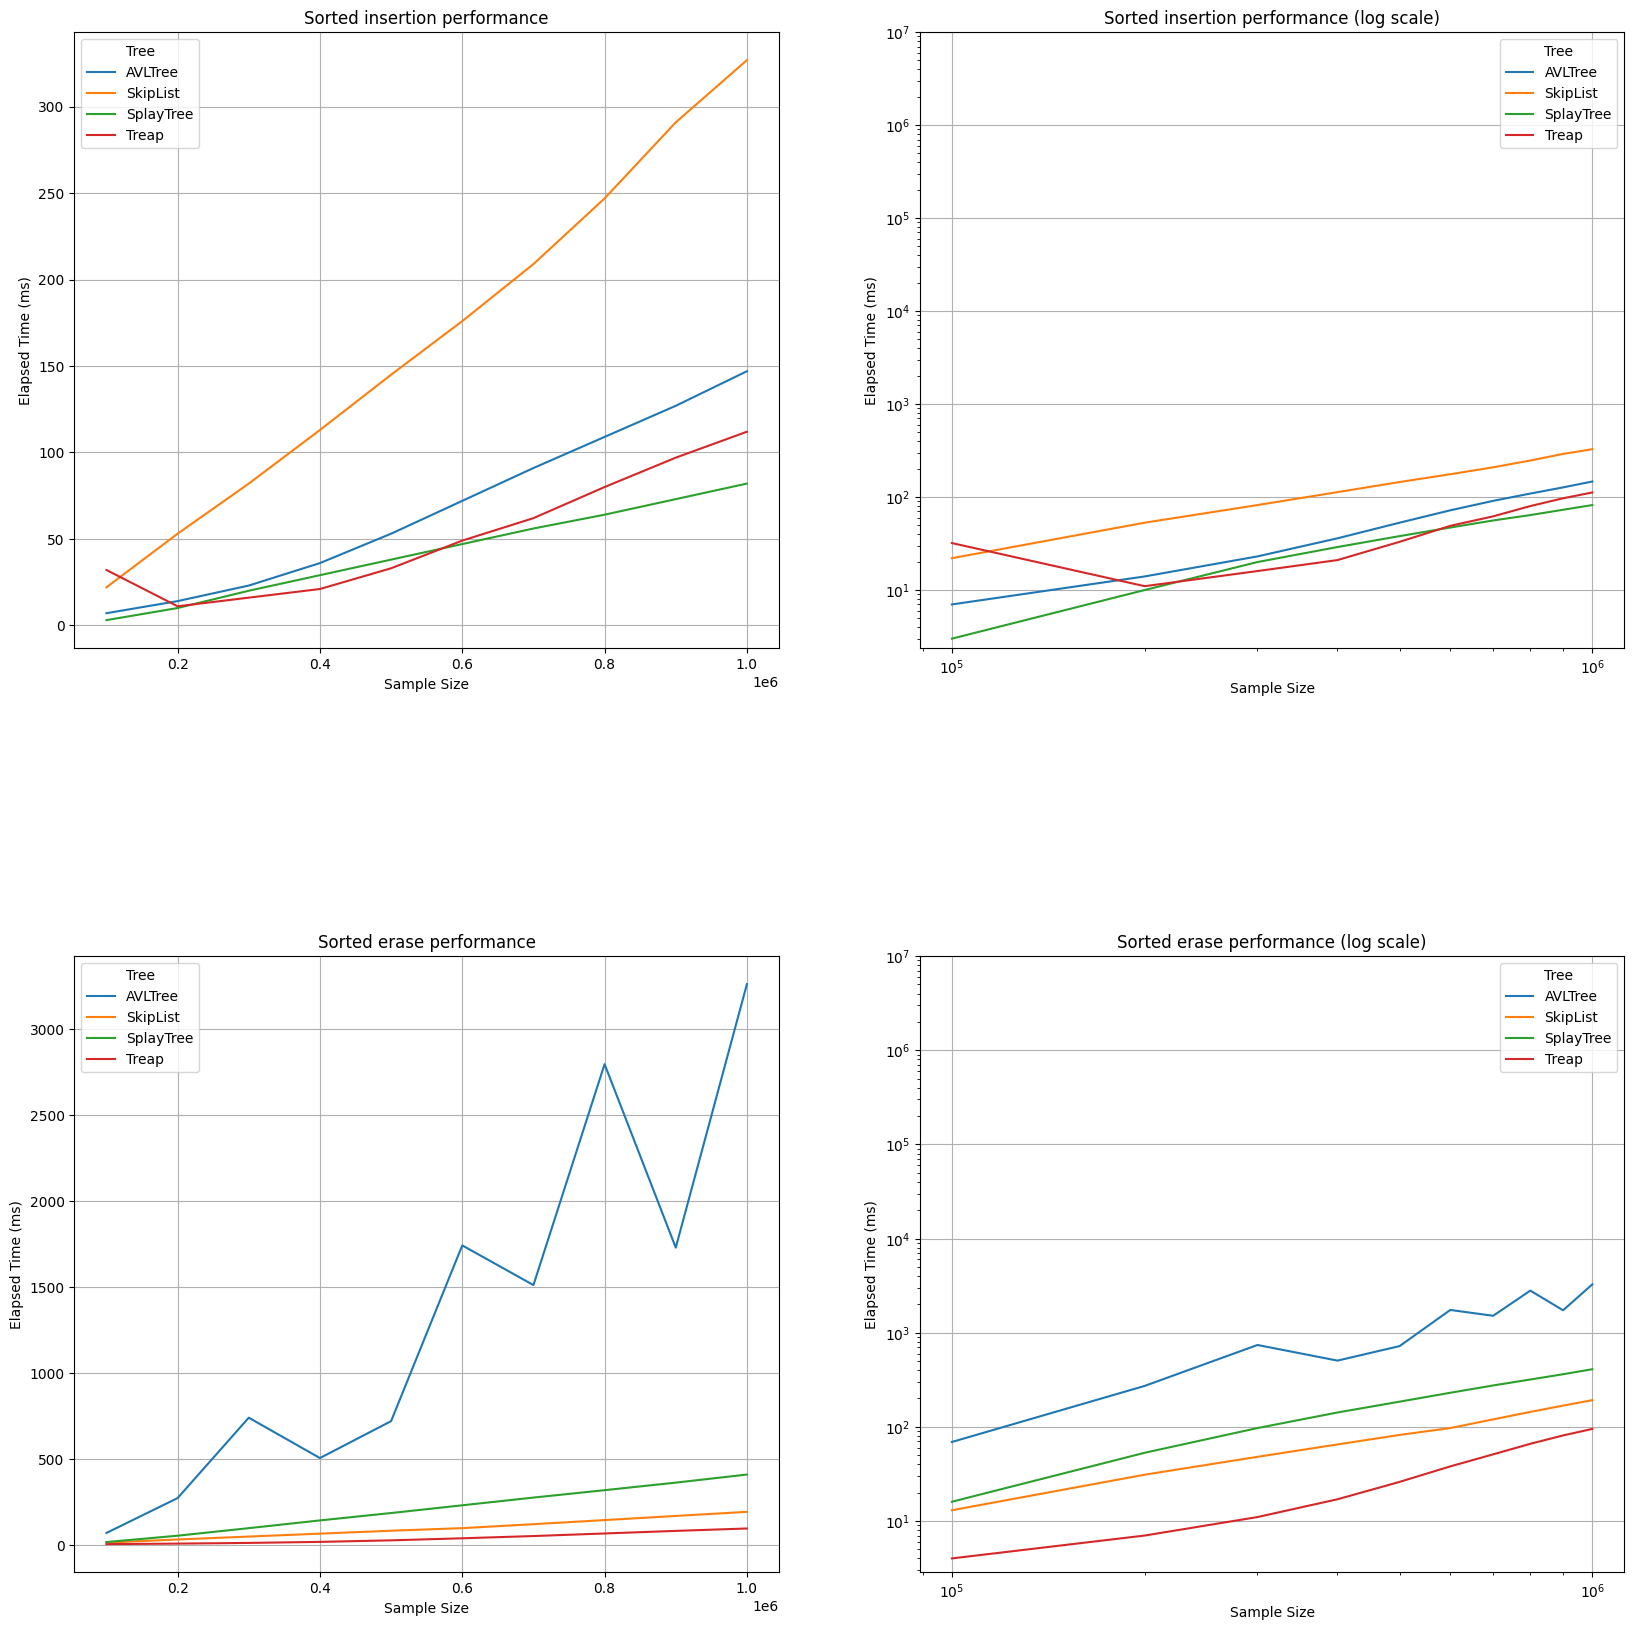

In [5]:
sorted_insert = sorted_insert[[col for col in sorted_insert.columns if col != "BinaryTree"]]
sorted_erase = sorted_erase[[col for col in sorted_erase.columns if col != "BinaryTree"]]
figure, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
insert, erase = axes
figure.subplots_adjust(hspace=0.5)
sorted_insert.plot(
        ax=insert[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance",
        grid=True)
sorted_insert[sorted_insert.values > 0].plot(
        ax=insert[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted insertion performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)
sorted_erase.plot(
        ax=erase[0],
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance",
        grid=True)
sorted_erase[sorted_erase.values > 0].plot(
        ax=erase[1],
        loglog=True,
        ylabel="Elapsed Time (ms)",
        title="Sorted erase performance (log scale)",
        yticks=np.logspace(1, 7, 7, base=10),
        grid=True)

Without naive binary search tree getting in the way we can see, that Splay Tree outperforms other
data structures on sorted insertions, but Treap outperforms others on subsequent
erase operations.

# Conclusions

Due to the 10 test requirement the acquired data is severely imprecise. This is
especially true for AVL-Tree, the performance of which does not seem to follow
any clear trend. The research clearly requires more tests. For trees other than
naive binary search tree the range of sample sizes for sorted data can be
extended, as they do not seem to work much slower on this kind of input.

Imprecision aside, Splay Tree and Treap seem to be the fastest data structures
both for sorted and random data. However, the plots show that the Skip List
slightly outperforms Splay Tree when performing erase tests on sorted data.

We strongly encourage to continue the research of this topic, as currently
available data fails to lead to any conclusive results.